<a href="https://colab.research.google.com/github/Mqondisi-Mavuso/Online_Courses/blob/main/Copy_of_cattle_id_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display as ipd
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import csv
import os

# Define the directory to search for JPG files
directory = "/content/drive/MyDrive/DATA/train"

# Create a CSV file to write the results to
with open("labels.csv", "w", newline="") as csvfile:
    fieldnames = ["filename", "id"]
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()

    # Loop through all subdirectories in the main directory
    for subdir, dirs, files in os.walk(directory):
        # Loop through all JPG files in each subdirectory
        for file in files:
            if file.lower().endswith(".jpg"):
                # Get the filename and ID
                filename = file
                id = file[3:file.index("_")]

                # Write the filename and ID to the CSV file
                writer.writerow({"filename": filename, "id": id})


In [ ]:
import os

def rename_images(root_dir):
    """
    Rename every image in every subdirectory using its directory name followed by its unique id.
    """
    # Traverse all directories and files in the root directory
    for subdir, dirs, files in os.walk(root_dir):
        # For each image file in the current directory
        for i, file in enumerate(files):
            # Check if the file is an image
            if file.endswith(".jpg") or file.endswith(".jpeg") or file.endswith(".png") or file.endswith(".gif"):
                # Get the directory name and use it as the prefix for the new filename
                prefix = os.path.basename(subdir)
                # Generate a unique id for the file
                unique_id = str(i+1)
                # Get the file extension
                ext = os.path.splitext(file)[1]
                # Generate the new filename
                new_filename = prefix + "_" + unique_id + ext
                # Rename the file
                os.rename(os.path.join(subdir, file), os.path.join(subdir, new_filename))

# renaming the images 
root_dir = "/content/drive/MyDrive/DATA/test"
rename_images(root_dir)


In [ ]:
import os
import random

# Set the path to the directory containing the subdirectories of images
parent_directory = "/content/drive/MyDrive/DATA/test"

# Set the number of images to keep in each subdirectory
num_images_to_keep = 10

# Loop through each subdirectory in the parent directory
for subdir in os.listdir(parent_directory):
    subdir_path = os.path.join(parent_directory, subdir)
    if os.path.isdir(subdir_path):
        # Get a list of all the images in the subdirectory
        images = [os.path.join(subdir_path, f) for f in os.listdir(subdir_path) if f.endswith(".jpg") or f.endswith(".png")]
        # If there are more than num_images_to_keep images, randomly select which ones to keep
        if len(images) > num_images_to_keep:
            images_to_keep = random.sample(images, num_images_to_keep)
            # Deleting images that were not selected to be kept
            for image in images:
                if image not in images_to_keep:
                    os.remove(image)


In [ ]:
# import the videos to read each frame 
cap = cv2.VideoCapture("DATA/test/c22/IMG_3751.MOV")

In [ ]:
# total number of frames
num_frame = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

In [ ]:
#getting the frames from each video
def get_frames(num_frame):
    for frame in range(num_frame//2):
        ret, img = cap.read()
        # this rotates the image before writing to file
        rotated_img = cv2.rotate(img, cv2.ROTATE_180)        
        if ret == False:
            break
        else:
            path = r"DATA/test/c22"
            name = f'/b_c{frame + 1}.jpg' 
            # write the file
            cv2.imwrite(f'{path}{name}', rotated_img)

In [ ]:
# this call will write the images to our training folder 
get_frames(num_frame=num_frame)
cap.release()

In [ ]:
# This is for downloading the YOLOv8 cow face images and labels
# !pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="my_api_here")                    
# project = rf.workspace("face-cow").project("thecowface")
# dataset = project.version(1).download("yolov8")

#!pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="GzhyGHnKKy58hjhTCDdG")
# project = rf.workspace("cowseg").project("thecowface-tj1no")
# dataset = project.version(1).download("coco-segmentation")


In [ ]:
#training the model to segment the cow face using custom dataset 
%pip install ultralytics
from ultralytics import YOLO

model = YOLO("/content/drive/MyDrive/Colab_Notebooks/runs/detect/train/weights/best.pt")
# Training the model
#!yolo train model=yolov8n-seg.pt data=coco128.yaml epochs=3 imgsz=640
#model.train(data="/content/drive/MyDrive/cow_id_AI/cow_facial_recognition/Thecowface-1/data.yaml", epochs=100)

In [ ]:
def show_img(image_path):
  img = cv2.imread(image_path)
  fig, ax = plt.subplots(figsize=(15,15))
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  ax.grid(False)           # remove the grid lines
  plt.show()

In [ ]:
# image_path = "/content/runs/detect/train/val_batch0_pred.jpg"
# show_img(image_path=image_path)

In [ ]:
# Load the first image
confusion_matrix = cv2.imread("/content/runs/detect/train/confusion_matrix.png")

# Load the second image
results = cv2.imread("/content/runs/detect/train/results.png")

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(20,20))

# Display the first image on the first subplot
ax[0].imshow(cv2.cvtColor(confusion_matrix, cv2.COLOR_BGR2RGB))

# Display the second image on the second subplot
ax[1].imshow(cv2.cvtColor(results, cv2.COLOR_BGR2RGB))

ax[0].grid(False)
ax[1].grid(False)    

# Show the figure
plt.show()

In [ ]:
#validate the model on images it has not seen

#model = YOLO("/content/runs/detect/train2/weights/best.pt")  # load a custom model

# Validate the model
#!yolo task=detect mode=val model="/content/runs/detect/train2/weights/best.pt" data=data.yaml
#!yolo val model='/content/runs/detect/train2/weights/best.pt data=coco128'

# import subprocess

# # Set up the command
# command = ['yolo', 'task=detect', 'mode=predict', 'model=/content/runs/detect/train/weights/best.pt', 'conf=0.25', 'source=/content/drive/MyDrive/DATA/test/c12/b_c13.jpg', 'save=True']

# # Run the command using subprocess
# result = subprocess.run(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)

# # Print the output
# print(result.stdout)



This is for saving the cropped facial images after facial detection

In [ ]:
from os import listdir, path
import cv2
import pandas as pd

the_path = "/content/drive/MyDrive/DATA/train/cow10"
image_filenames = listdir(the_path)

for filename in image_filenames:
    image_path = path.join(the_path, filename)
    image = cv2.imread(image_path)
    results = model(image)  # predict on an image
    a = results[0].boxes.boxes
    px = pd.DataFrame(a).astype("float")

    for index, row in px.iterrows():
        x1 = int(row[0])
        y1 = int(row[1])
        x2 = int(row[2])
        y2 = int(row[3])
        
        if (x1 != 0) and (x2 != 0):
            # Crop the object from the image
            object_image = image[y1:y2, x1:x2]
            
            # Save the cropped image as a new file in the same directory as the original image
            new_filename = f"{filename[:-4]}_cropped_{index}.jpg"
            cv2.imwrite(path.join(the_path, new_filename), object_image)
        else:
          continue


In [ ]:
# removing the uncropped images
import os

folder_path = "/content/drive/MyDrive/DATA/train/c9"

for file_name in os.listdir(folder_path):
    if file_name.endswith(".jpg") and "cr" not in file_name:
        os.remove(os.path.join(folder_path, file_name))


In [ ]:
################################## Cow Face Segmentation Above ######################### 

In [ ]:
################################## Cow Face Identification below ######################### 

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
image_gen = ImageDataGenerator(rotation_range=30,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               rescale=1/255,
                               shear_range=0.2,
                               zoom_range=0.2,
                               horizontal_flip=True,
                               fill_mode="nearest"                                
                                )

In [ ]:
#image_gen.flow_from_directory("DATA/train/")

Creating the Siamese Neural Network 

In [ ]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda
from keras.models import Model
import keras.backend as K
from keras.optimizers import RMSprop
from keras.losses import binary_crossentropy
from keras.utils import plot_model
import numpy as np
import os

#Resten model

# root directory 
root_dir = "/content/drive/MyDrive/DATA/train"

# Define input shape of the images
input_shape = (224, 224, 3)

# Define the base network (shared weights)
#updated
def create_base_network(input_shape):
    """
    Base network to be shared (eq. to feature extraction).
    """
    input = Input(shape=input_shape)
    x = Conv2D(22, (3, 3), activation='relu')(input)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(128, (3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    # Output layer with 22 units and softmax activation
    x = Dense(22, activation='softmax',name="output_layer")(x)
    model = Model(input, x)
    return model

def contrastive_loss(y_true, y_pred, margin=1.0):
    y_true = K.cast(y_true, 'float32')
    y_pred = K.cast(y_pred, 'float32')
    
    square_pred = K.square(y_pred)
    margin_square = K.square(K.maximum(margin - y_pred, 0))
    return K.mean(y_true * square_pred + (1 - y_true) * margin_square)



# Create the Siamese network
base_network = create_base_network(input_shape)
input_a = Input(shape=input_shape)
input_b = Input(shape=input_shape)
processed_a = base_network(input_a)
processed_b = base_network(input_b)

# Define the custom distance metric
def euclidean_distance(vects):
    x, y = vects
    return K.sqrt(K.sum(K.square(x - y), axis=1, keepdims=True))

def eucl_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0], 1)

distance = Lambda(euclidean_distance, output_shape=eucl_dist_output_shape)([processed_a, processed_b])

# Define the final model
model = Model([input_a, input_b], distance)
print(model.get_output_shape_at)
print(f"the second final shape of the model= {model.input_shape}")

rms = RMSprop()
model.compile(loss=contrastive_loss, optimizer=rms)

print(f"the after compiling of the model= {model.input_shape}")

#updated version
# def create_data(root_dir):
#     """
#     Creates pairs of images and labels from the data.
#     """
#     pairs = []
#     labels = []
#     subdirs = os.listdir(root_dir)
#     for i, subdir in enumerate(subdirs):
#         img_paths = [os.path.join(root_dir, subdir, fname) for fname in os.listdir(os.path.join(root_dir, subdir))]
#         for j in range(len(img_paths)):
#             for k in range(j+1, len(img_paths)):
#                 pairs.append([img_paths[j], img_paths[k]])
#                 if subdir == subdirs[j]:
#                     # if the two images belong to the same cow
#                     labels.append(i)
#                 else:
#                     # if the two images belong to different cows
#                     labels.append(0)
#     return pairs, labels

#after training version
def create_data(root_dir):
    """
    Creates pairs of images and labels from the data.
    """
    pairs = []
    labels = []
    subdirs = os.listdir(root_dir)
    for i, subdir in enumerate(subdirs):
        img_paths = [os.path.join(root_dir, subdir, fname) for fname in os.listdir(os.path.join(root_dir, subdir))]
        for j in range(len(img_paths)):
            for k in range(j+1, len(img_paths)):
                if os.path.isfile(img_paths[j]) and os.path.isfile(img_paths[k]):
                    pairs.append([img_paths[j], img_paths[k]])
                    if subdir == subdirs[i]:  # Changed from subdirs[j] to subdirs[i]
                        # if the two images belong to the same cow
                        labels.append(1)  # Changed from i to 1
                    else:
                        # if the two images belong to different cows
                        labels.append(0)
    return pairs, labels

# Create the training and validation data
train_pairs, train_labels = create_data(root_dir)
val_pairs, val_labels = create_data(root_dir)

(None, 224, 224, 3)
<bound method Layer.get_output_shape_at of <keras.engine.functional.Functional object at 0x7f6bc80d2340>>
the second final shape of the model= [(None, 224, 224, 3), (None, 224, 224, 3)]
the after compiling of the model= [(None, 224, 224, 3), (None, 224, 224, 3)]


In [ ]:
# Define a function to load and preprocess the images

#after training 
def load_and_preprocess_images(image_paths):
    images = []
    for path in image_paths:
        if os.path.isfile(path):
            img = load_img(path, target_size=input_shape[:2])
            img = img_to_array(img) / 255.
            images.append(img)
    return np.array(images)

#chat gpt-4
def generate_batch(data_pairs, data_labels, batch_size):
    while True:
        indices = np.random.randint(0, len(data_pairs), size=batch_size)
        batch_pairs = [data_pairs[i] for i in indices]
        batch_labels = [data_labels[i] for i in indices]
        x1 = load_and_preprocess_images([pair[0] for pair in batch_pairs])
        x2 = load_and_preprocess_images([pair[1] for pair in batch_pairs])

        # Ensure batch_size is maintained
        if x1.shape[0] == batch_size and x2.shape[0] == batch_size:
            yield [x1, x2], np.array(batch_labels)


In [ ]:
import tensorflow
from tensorflow.keras.utils import load_img, img_to_array
#from keras.backend import K
from tensorflow.keras import backend as K

batch_size = 10
epochs = 10
steps_per_epoch = len(train_pairs) // batch_size
validation_steps = len(val_pairs) // batch_size

# Compile the model with contrastive loss
model.compile(loss=contrastive_loss, optimizer='adam')
train_batches = generate_batch(train_pairs, train_labels, batch_size)

# Train the model
model.fit(train_batches,steps_per_epoch=steps_per_epoch,
          epochs=epochs,
          validation_data=generate_batch(val_pairs, val_labels, batch_size),
          validation_steps=validation_steps)

# Save the model
model.save("/content/drive/MyDrive/DATA/cow_facial_recognition_model_second.h5")


In [ ]:
#Evaluate the model on some test data
test_pairs, test_labels = create_data("/content/drive/MyDrive/DATA/test")

x1_test = load_and_preprocess_images([pair[0] for pair in test_pairs])
x2_test = load_and_preprocess_images([pair[1] for pair in test_pairs])

preds = model.predict([x1_test, x2_test])
acc = np.mean(np.round(preds) == test_labels)
print(f"Accuracy on test data: {acc}")


31/31 [==============================] - 6s 179ms/step
Accuracy on test data: 0.0


Showing the results of the model

Check it agaist new images 


In [ ]:
# extract function
def extract_features(model, image):
    base_network = model.layers[2]
    feature_extractor = Model(inputs=base_network.input, outputs=base_network.output)
    features = feature_extractor.predict(np.expand_dims(image, axis=0))
    return features

In [ ]:
# Load the images and their corresponding cow IDs from the training dataset. We will use these images to compare against the new image:
def load_training_data(root_dir):
    image_list = []
    cow_ids = []

    subdirs = os.listdir(root_dir)
    for cow_id, subdir in enumerate(subdirs):
        img_paths = [os.path.join(root_dir, subdir, fname) for fname in os.listdir(os.path.join(root_dir, subdir))]
        for img_path in img_paths:
            if os.path.isfile(img_path):
                img = load_img(img_path, target_size=input_shape[:2])
                img = img_to_array(img) / 255.
                image_list.append(img)
                cow_ids.append(cow_id)

    return np.array(image_list), np.array(cow_ids)

training_images, cow_ids = load_training_data(root_dir)

In [ ]:
# infer function
def infer_cow_id(model, new_image, training_images, cow_ids):
    new_image_features = extract_features(model, new_image)

    distances = []

    for img in training_images:
        img_features = extract_features(model, img)
        distance = np.linalg.norm(new_image_features - img_features)
        distances.append(distance)

    distances = np.array(distances)
    predicted_cow_id = cow_ids[np.argmin(distances)]
    return predicted_cow_id


In [ ]:
# loading the new image
new_image_path = "/content/drive/MyDrive/DATA/test/c4/c4_8.jpg"
new_image = load_img(new_image_path, target_size=input_shape[:2])
new_image = img_to_array(new_image) / 255.

# loading the model
model_path = "/content/drive/MyDrive/DATA/cow_facial_recognition_model.h5"
model = load_model(model_path, compile=False, custom_objects={'contrastive_loss': contrastive_loss})


predicted_cow_id = infer_cow_id(model, new_image, training_images, cow_ids)
print(f"Predicted cow ID: {predicted_cow_id}")


Using the ResNet Pretrained model

In [ ]:
# Creating validation directory 
import os
import shutil
import random

def create_validation_directory(original_dir, validation_dir, split_ratio=0.10):
    if not os.path.exists(validation_dir):
        os.makedirs(validation_dir)

    for subdir, dirs, files in os.walk(original_dir):
        subdir_name = os.path.basename(subdir)
        if not subdir_name.startswith("cow"):
            continue

        subdir_validation_path = os.path.join(validation_dir, subdir_name)
        if not os.path.exists(subdir_validation_path):
            os.makedirs(subdir_validation_path)

        image_files = [file for file in files if file.lower().endswith(('.png', '.jpg', '.jpeg'))]
        random.shuffle(image_files)
        validation_files_count = int(len(image_files) * split_ratio)

        for i in range(validation_files_count):
            src = os.path.join(subdir, image_files[i])
            dst = os.path.join(subdir_validation_path, image_files[i])
            shutil.move(src, dst)

original_dir = "/content/drive/MyDrive/DATA/train"
validation_dir = "/content/drive/MyDrive/DATA"
create_validation_directory(original_dir, validation_dir)


Using the Pretrained model

In [41]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Step 1: Prepare your dataset
train_dir = "/content/drive/MyDrive/DATA/train"
validation_dir = "/content/drive/MyDrive/DATA/validation"
test_dir = "/content/drive/MyDrive/DATA/test"

img_height, img_width = 224, 224
batch_size = 1

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

num_classes = len(train_generator.class_indices)
seq_model = Sequential()

# Choose a pre-trained model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
seq_model.add(base_model)

# avoid retraining the enteir model
for layer in seq_model.layers:
  layer.trainable = False

# Fine-tune the model with additional layers
x = seq_model.output
# x = GlobalAveragePooling2D()(x)
# x = Dense(1024, activation='relu')(x)
# x = Dropout(0.5)(x)
# x = Dense(512, activation='relu')(x)
# x = Dropout(0.5)(x)
x = Flatten()(x)       # I added this later
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=seq_model.input, outputs=predictions)

for layer in seq_model.layers:
    layer.trainable = False


model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

epochs = 20

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    verbose=1
)

# Optional: Unfreeze some layers and fine-tune the model further
# for layer in model.layers[:143]:
#     layer.trainable = False
# for layer in model.layers[143:]:
#     layer.trainable = True

# model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# fine_tune_epochs = 10
# total_epochs = epochs + fine_tune_epochs

# history_fine_tune = model.fit(
#     train_generator,
#     initial_epoch=history.epoch[-1],
#     epochs=total_epochs,
#     validation_data=validation_generator,
#     verbose=1
# )

# Step 4: Evaluate the model
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

evaluation = model.evaluate(test_generator)
print(f"Test loss: {evaluation[0]}, Test accuracy: {evaluation[1]}")



Found 373 images belonging to 22 classes.
Found 30 images belonging to 22 classes.
Epoch 1/20
373/373 [==============================] - 32s 76ms/step - loss: 25.2375 - accuracy: 0.0643 - val_loss: 21.7835 - val_accuracy: 0.1333
Epoch 2/20
373/373 [==============================] - 27s 72ms/step - loss: 24.8811 - accuracy: 0.1072 - val_loss: 17.7565 - val_accuracy: 0.2667
Epoch 3/20
373/373 [==============================] - 26s 71ms/step - loss: 22.9196 - accuracy: 0.1046 - val_loss: 15.0116 - val_accuracy: 0.2333
Epoch 4/20
373/373 [==============================] - 26s 71ms/step - loss: 22.0694 - accuracy: 0.1421 - val_loss: 18.7508 - val_accuracy: 0.1667
Epoch 5/20
373/373 [==============================] - 26s 71ms/step - loss: 26.0526 - accuracy: 0.1367 - val_loss: 13.2443 - val_accuracy: 0.2667
Epoch 6/20
373/373 [==============================] - 26s 71ms/step - loss: 25.7544 - accuracy: 0.1206 - val_loss: 17.4633 - val_accuracy: 0.3333
Epoch 7/20
373/373 [=====================

Visualising the perfomance of model

Initial training History


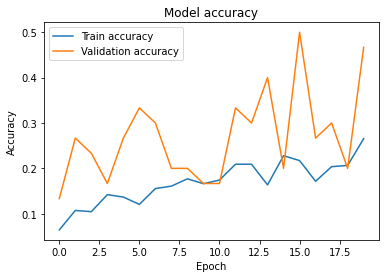

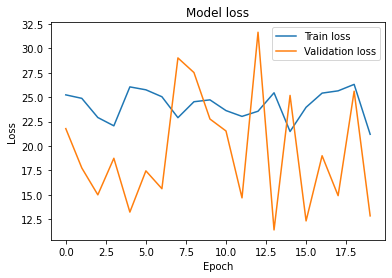

fine-tuning phase History


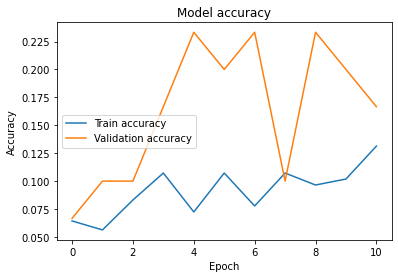

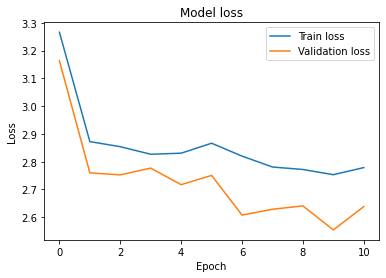

In [42]:
import matplotlib.pyplot as plt

def plot_history(history):
    # Plot the accuracy
    plt.figure()
    plt.plot(history.history['accuracy'], label='Train accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation accuracy')
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Plot the loss
    plt.figure()
    plt.plot(history.history['loss'], label='Train loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Call the plot_history function after training the model
# For the initial training phase
print("Initial training History")
plot_history(history)

# For the fine-tuning phase
print("fine-tuning phase History")
plot_history(history_fine_tune)


Inference

In [ ]:
# Predicting on images it has not seen before
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input

def preprocess_image(image_path, img_height=224, img_width=224):
    img = image.load_img(image_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

def recognize_cow(image_path, model, class_indices):
    img_array = preprocess_image(image_path)
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])

    for cow_id, idx in class_indices.items():
        if idx == predicted_class_index:
            return cow_id

    return None

image_path = "/content/drive/MyDrive/DATA/test/c9/c9_9.jpg"
class_indices = train_generator.class_indices
recognized_cow_id = recognize_cow(image_path, model, class_indices)
print(f"Recognized cow ID: {recognized_cow_id}")


1/1 [==============================] - 1s 1s/step
Recognized cow ID: cow2


Now using Vgg Model

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/DATA/train'
valid_path = '/content/drive/MyDrive/DATA/train/test'

# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False
  
  # useful for getting number of classes
folders = glob('Datasets/Train/*')
  

# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

58889256/58889256 [==============================] - 1s 0us/step
Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/DATA/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/DATA/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

'''r=model.fit_generator(training_set,
                         samples_per_epoch = 8000,
                         nb_epoch = 5,
                         validation_data = test_set,
                         nb_val_samples = 2000)'''



Found 373 images belonging to 22 classes.
Found 220 images belonging to 22 classes.


'r=model.fit_generator(training_set,\n                         samples_per_epoch = 8000,\n                         nb_epoch = 5,\n                         validation_data = test_set,\n                         nb_val_samples = 2000)'

In [ ]:
# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

import tensorflow as tf

from keras.models import load_model

model.save('facefeatures_new_model.h5')

Epoch 1/5


InvalidArgumentError: ignored